# DataLoader Demo
#### This project uses a custom DataLoader to load batches of aircraft images along with their labels.

In [21]:
import sys
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import yaml

sys.path.append('/Users/jonathanlevin/Documents/UO/Courses/DSCI/410DL/Project/early-detection')  # CHANGE THIS TO YOUR PATH
from src.data_handler.dataloader import get_data_loaders

# Load the configuration file
with open('../config.yaml', 'r') as f:
    config = yaml.safe_load(f)

crop_size = config['transforms']['crop_size']

In [26]:
split_data_dir = '../data/split'

train_loader, val_loader, test_loader, num_classes, mean, std = get_data_loaders(split_data_dir, 256, 5, full_transform=False)

print('\nNumber of classes:', num_classes)
print('\nMean:', mean)
print('\nStd:', std)
# get some random training images
images, labels = next(iter(train_loader))

print(f'\n{images.shape}')

Found 741 files in ../data/split/train
Files found: ['../data/split/train/F14/e8847910420ece97dc7260d130cf7542_0.jpg', '../data/split/train/F14/b24d212ff4f9e680bea21e183443a2c8_1.jpg', '../data/split/train/F14/023b32ea680c00d59c34f254b87400f6_3.jpg', '../data/split/train/F14/88c2d4d1d4f5ab539558cf4129cd9ef2_0.jpg', '../data/split/train/F14/2aa9accbaf8359cb08cf3fbd2068f880_1.jpg', '../data/split/train/F14/d44adc284c412cbaa84cfb6b1db2b0e9_0.jpg', '../data/split/train/F14/70bf0cc0ecc152e813130d7e94f2ba5a_0.jpg', '../data/split/train/F14/d7bf01f9f11cbc22203be0ebeae7df4d_1.jpg', '../data/split/train/F14/20ace94a53f94cd4df48ca125d11bdf6_0.jpg', '../data/split/train/F14/a0c8bc9659b9afa970465b96a8cfc9b3_2.jpg', '../data/split/train/F14/74a66f83fa9adeb67041aa1aa0df5f8e_0.jpg', '../data/split/train/F14/e98307956fcfd8999bf30ac94939a373_0.jpg', '../data/split/train/F14/d0b1c7c3e43c07223ca5169fb4eb1054_1.jpg', '../data/split/train/F14/d0b1c7c3e43c07223ca5169fb4eb1054_0.jpg', '../data/split/train/F1

# Visualizing a Batch of Training Images

/var/folders/jj/mntk53z114s91ncbd_rzyddc0000gn/T/ipykernel_58919/29415605.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plot_images = images * torch.tensor(std).view(1,3,1,1) + torch.tensor(mean).view(1,3,1,1)


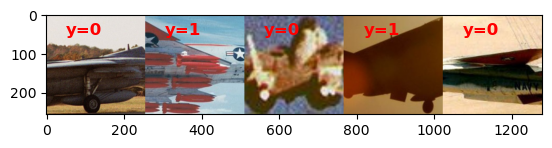

In [27]:
# plot images
plot_images = images * torch.tensor(std).view(1,3,1,1) + torch.tensor(mean).view(1,3,1,1)
plot_images = (plot_images * 255.0)
plot_images = plot_images.numpy().transpose(0, 2, 3, 1).astype(np.uint8)
plt.imshow(np.hstack(plot_images))
for index, l in enumerate(labels):
    plt.text(index*256+50, 50, "y="+str(l.item()), color='red', fontsize=12,fontweight='bold')
plt.show()